In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neural_network import MLPClassifier as ANN
from sklearn.neighbors import KNeighborsClassifier as KNN

In [93]:
columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole Weight",
    "Shucked Weight",
    "Viscera Weight",
    "Shell Weight",
    "Rings"
]

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                    names=columns)


In [94]:
data.head()

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [95]:
# Split the "Rings" values into three categories.
# 0: <= 8
# 1: 9 or 10
# 2: anything else
def splitRanges(n):
    if n <= 8:
        return 0
    elif 9 <= n <= 10:
        return 1
    return 2
    

In [96]:
data["Rings"] = data["Rings"].apply(splitRanges)
y = data["Rings"]
y.value_counts()

2    1447
0    1407
1    1323
Name: Rings, dtype: int64

In [97]:
#Drop rings from the data frame and apply get_dummies to the remainder
x = pd.get_dummies(data.drop("Rings", axis=1))
x

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [98]:
# Reduce training data into 4 principal components.
pca = PCA(n_components=4)
pca.fit(x)
x_pc = pca.transform(x)
x_pc

array([[ 0.02619327, -0.71058533, -0.48658405,  0.0064785 ],
       [-0.22756943, -0.73781423, -0.73117953,  0.03771949],
       [ 0.12675306,  0.71396346, -0.46547905, -0.04083072],
       ...,
       [ 0.59350394, -0.65020623,  0.06244935,  0.0136522 ],
       [ 0.50235063,  0.75325823, -0.09970724,  0.03770439],
       [ 1.23688945, -0.58292687,  0.69005653,  0.12212455]])

In [110]:
# We will train some models.
# QDA, KNN, and ANN
qda = QDA()
knn = KNN()
ann = ANN(max_iter=1000)

In [103]:
# Run 5 fold cross validation and get accuracy scores for each model.
from sklearn.model_selection import cross_val_score
qda_acc = cross_val_score(qda, x_pc, y, scoring="accuracy") 
knn_acc = cross_val_score(knn, x_pc, y, scoring="accuracy")
ann_acc = cross_val_score(ann, x_pc, y, scoring="accuracy")

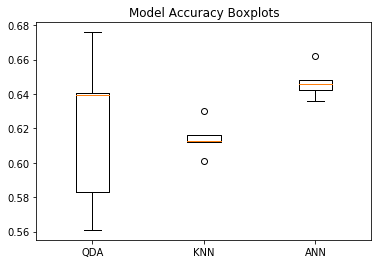

In [109]:
# Take a look at the accuracy boxplots.
plt.boxplot([qda_acc, knn_acc, ann_acc])
_ = plt.xticks([1,2,3], labels=["QDA", "KNN", "ANN"])
_ = plt.title("Model Accuracy Boxplots")